# Description and Problem Statement:

Let's analyse how the volume of a crypto currency will affect the price of the crypto currency. In my case, SHIBA INU (ticker:SHIB)'s dataset will be used.

What is Shiba Inu?
Shiba Inu (ticker: SHIB), also known informally as Shiba Token, is a decentralized cryptocurrency created in August 2020 by an anonymous person or persons known as "Ryoshi". Shiba Inu (柴犬) is a Japanese term for a breed of dog; it is the dog that is depicted in Dogecoin's symbol, which itself was originally a joke cryptocurrency based on the Doge meme. Shiba Inu was created in August 2020, dubbing itself the 'dogecoin killer'. On 13 May, Vitalik Buterin donated more than 50 trillion SHIB (worth over $1 billion at the time) to the India COVID-Crypto Relief Fund. The cryptocurrency notably surged in early October 2021. Initially up over 55% after rumors of the launch of a decentralized exchange, its value continued rising with an increase of 240% over the week.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# EDA:

In [2]:
df = pd.read_csv('D:\\datasets\\SHIB-USD.csv') 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-19,0.000016,0.000016,0.000006,0.000009,0.000009,3271067996
1,2021-05-20,0.000009,0.000012,0.000008,0.000010,0.000010,2507945867
2,2021-05-21,0.000010,0.000010,0.000007,0.000008,0.000008,1547207565
3,2021-05-22,0.000008,0.000010,0.000007,0.000008,0.000008,1229821215
4,2021-05-23,0.000008,0.000010,0.000007,0.000008,0.000008,1585032040


The closing price is the raw price, which is just the cash value of the last transacted price before the day ends. The adjusted closing price factors in anything that might affect the crypto price after the day ends. A crypto's price is typically affected by supply and demand of market participants.

In [3]:
df.info() #seeing the different dtypes to work with
df.isnull().sum() #to check if there are any NAN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       165 non-null    object 
 1   Open       165 non-null    float64
 2   High       165 non-null    float64
 3   Low        165 non-null    float64
 4   Close      165 non-null    float64
 5   Adj Close  165 non-null    float64
 6   Volume     165 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 9.1+ KB


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,165.000000,165.000000,165.000000,165.000000,165.000000,1.650000e+02
mean,0.000012,0.000013,0.000011,0.000012,0.000012,1.921159e+09
std,0.000012,0.000014,0.000010,0.000012,0.000012,4.838933e+09
min,0.000006,0.000006,0.000005,0.000006,0.000006,1.841112e+08
25%,0.000007,0.000007,0.000007,0.000007,0.000007,3.127893e+08
50%,0.000008,0.000008,0.000007,0.000008,0.000008,4.723039e+08
75%,0.000009,0.000010,0.000008,0.000009,0.000009,9.864033e+08
max,0.000079,0.000088,0.000068,0.000080,0.000080,3.905385e+10


Scaling will have to be done for volume as the other values are <1

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Close Price History')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Close Price USD')

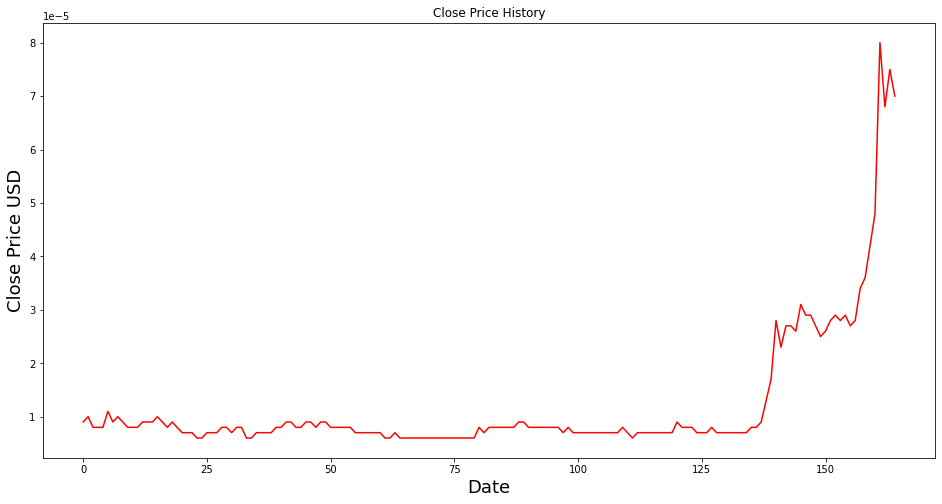

In [5]:
#plotting the data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

From 2021-06 to 2021-10 the price of SHIB was relatively constant however, between 2021-10 and 2021-11 there were two spikes which led to SHIB skyrocketting towards the end of 2021-11. 

# Linear Regression: 

In [15]:
X = df[[ 'Open', 'High', 'Low','Volume']]
y = df['Close']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=99)

In [8]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('D:\\datasets\\SHIB-USD.csv') 

ss = StandardScaler() # initialize transformer 

ss.fit(df[['Volume']])
df[['Volume']] = ss.transform(df[['Volume']]) # remember to assign back to update

X = df[[ 'Open', 'High', 'Low','Volume']] #Updating the stadardized Volume
y = df['Close']

StandardScaler()

MSE: 7.892651079589878e-13
R-squared: 0.9948788887083522
Adjusted R-squared: 0.994750860926061
Coefficients:  [-6.21962742e-01  1.10081969e+00  5.43991717e-01 -1.48246045e-06]
Intercept:  -9.386829298901429e-07


(array([-6.21962742e-01,  1.10081969e+00,  5.43991717e-01, -1.48246045e-06]),
 -9.386829298901429e-07)

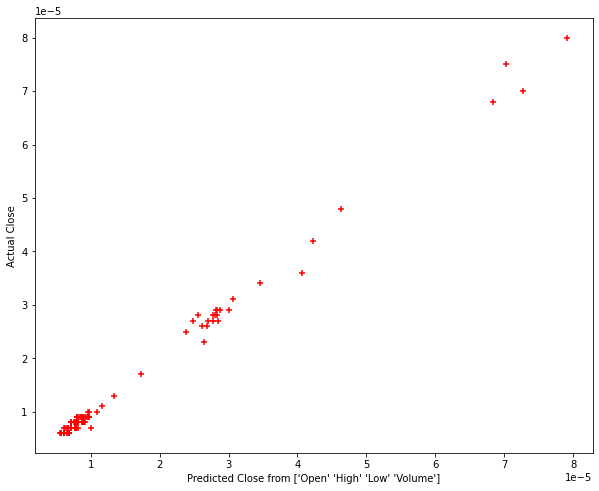

In [9]:
from sklearn.metrics import mean_squared_error  # import
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression 

def train_predict(X,y):
    lm = LinearRegression()
    lm.fit(X, y)
    predictions = lm.predict(X)
    # Plot our predictions
    plt.figure(figsize=(10,8))
    plt.scatter(predictions, y, s=30, c='r', marker='+')
    plt.xlabel(f"Predicted Close from {X.columns.values}")
    plt.ylabel("Actual Close")
    
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)
    adj_r2 = 1 - (len(y)-1)/(len(y)-len(X.columns)-1)*(1 - r2)
    
    print("MSE:", mse)
    print("R-squared:", r2)
    print("Adjusted R-squared:", adj_r2)

    
    print("Coefficients: ",lm.coef_)
    print("Intercept: ",lm.intercept_)
    
    return lm.coef_,lm.intercept_

train_predict(X,y)



From MSE and Adjusted R-squared, it can be concluded that there the prediction model might be ablet to successfully predict the close price as the MSE is very low which means it is accurate and the Adjusted R-squared is very close to 1 which means that it has a strong positive corelation between the predicted and actual close price.

<AxesSubplot:xlabel='Open', ylabel='Close'>

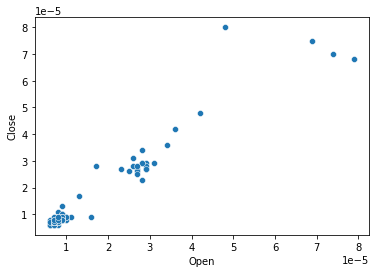

<AxesSubplot:xlabel='High', ylabel='Close'>

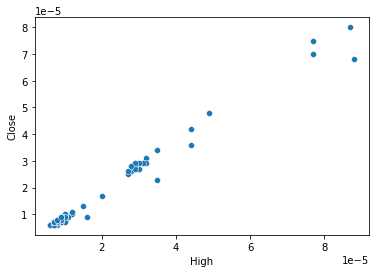

<AxesSubplot:xlabel='Low', ylabel='Close'>

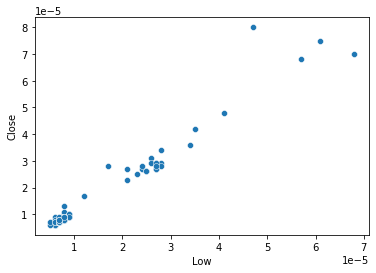

<AxesSubplot:xlabel='Volume', ylabel='Close'>

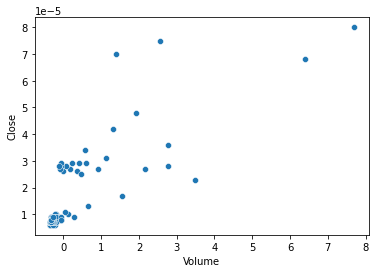

In [10]:
#plotting seversl graphs to see the impact of each factor on close price
sns.scatterplot(x='Open',y='Close',data=df)
plt.show()
sns.scatterplot(x='High',y='Close',data=df)
plt.show()
sns.scatterplot(x='Low',y='Close',data=df)
plt.show()
sns.scatterplot(x='Volume',y='Close',data=df)
plt.show()

However, as seen from the scatter plots, volume does not have much corelation with the closing price of the coin. Thus, I would do another analysis without the volume to see how the prediction scores.

In [11]:
#analysing without volume
X = df[[ 'Open', 'High', 'Low']]
y = df['Close']

MSE: 9.035241026297176e-13
R-squared: 0.9941375243405622
Adjusted R-squared: 0.9940282856636783
Coefficients:  [-0.58265318  0.79390139  0.79908094]
Intercept:  -1.8175975537091098e-07


(array([-0.58265318,  0.79390139,  0.79908094]), -1.8175975537091098e-07)

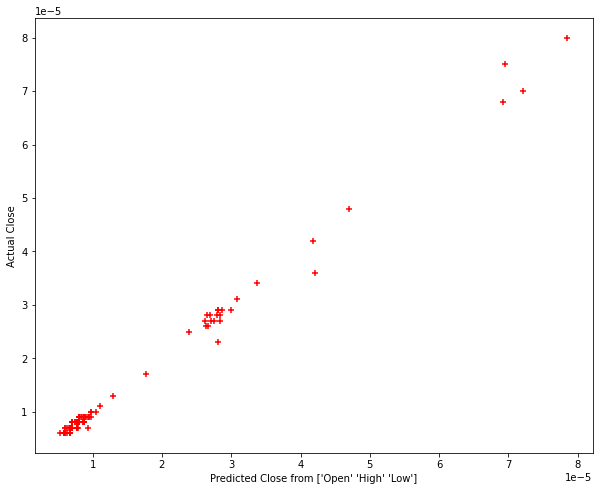

In [12]:
from sklearn.metrics import mean_squared_error  # import
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression 

def train_predict(X,y):
    lm = LinearRegression()
    lm.fit(X, y)
    predictions = lm.predict(X)
    # Plot our predictions
    plt.figure(figsize=(10,8))
    plt.scatter(predictions, y, s=30, c='r', marker='+')
    plt.xlabel(f"Predicted Close from {X.columns.values}")
    plt.ylabel("Actual Close")
    
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)
    adj_r2 = 1 - (len(y)-1)/(len(y)-len(X.columns)-1)*(1 - r2)
    
    print("MSE:", mse)
    print("R-squared:", r2)
    print("Adjusted R-squared:", adj_r2)

    
    print("Coefficients: ",lm.coef_)
    print("Intercept: ",lm.intercept_)
    
    return lm.coef_,lm.intercept_

train_predict(X,y)


    MSE: 9.035241026297176e-13 (without volume)
    MSE: 7.892651079589878e-13


    Adjusted R-squared: 0.9940282856636783 (without volume)
    Adjusted R-squared: 0.994750860926061

The anaylsis without volume shows that the MSE and Adjusted R-squared are lower compared to the analysis with volume. This means that the claim where the volume will not affect the analysis is false. Instead it gives a more accurate and stronger positive corelation between predicted and actual close price when the data for volume is used.

# Conclusion:

The volume of a cyrpto coin will affect the price of the crypto coin however, the volume is more influenced by the demand and supply, rumours. Particularly for SHIB, its price will be affected by tweets from Elon Musk, CEO of TESLA which is difficult to analyse as we would never know when Musk will do anything to affect the price of SHIB drastically as the community nevertheless buys SHIB anytime Musk mentions the breed.

# Limitations and Improvements:

I could analyze other cryptos and do some cross referencing since the crypto market is highly interconnected and generating new featuressuch as:
    
    -Realized Volatility
    -Moving Average
    -Cumulative Returns of Price
    -Average True Range Calculation
    -Volume Weighted Average Price
        -VWAP
        -Trend Strength of the VWAP
       -VWAP Returns
    -Exponentially Weighted Moving Average
    -Momentum
    -Rate of Change
    -Relative Strength Index
    -Stochastic Oscillators
    -Linear Regression Slope
    -Log of Return
    -Log Transformation